<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Bedford_Degdredation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (9, 9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Degredation Analysis for Bedford PV-01

In [2]:
bedford_1 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Bedford1.csv')

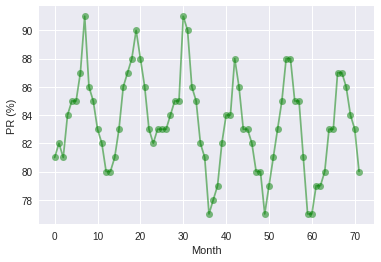

In [10]:
fig, axs = plt.subplots()
axs.plot(bedford_1.index, bedford_1.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(bedford_1.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [4]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [5]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.59e-17
Time:                        18:09:25   Log-Likelihood:                -57.052
No. Observations:                  60   AIC:                             118.1
Df Residuals:                      58   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4024      0.188    455.390      0.000      85.027      85.778
x1            -0.0564      0.005    -11.880      0.000      -0.066      -0.047
==============================================================================
Omnibus:                        4.396   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.466
Skew:                           0.466   Prob(JB):                        0.177
Kurtosis:                       2.281   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, tehrefore does have a relationship with the target.

In [6]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.68

In [7]:
results.params

array([ 8.54023618e+01, -5.64045568e-02])

In [8]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.79

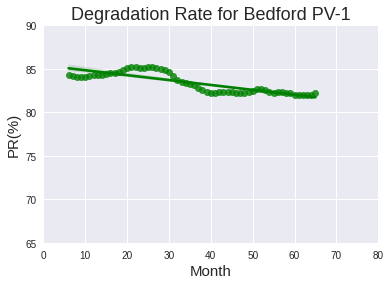

In [9]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = bedford_1, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Bedford PV-1",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Bedford PV-1 range -0.68 & -0.79%

# Degredation Analysis for Bedford PV-02

In [11]:
bedford_2 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Bedford2.csv')

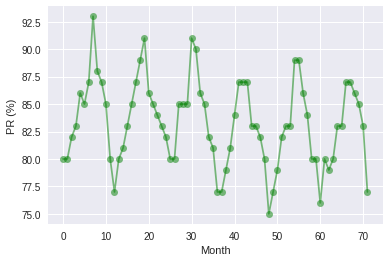

In [12]:
fig, axs = plt.subplots()
axs.plot(bedford_2.index, bedford_2.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(bedford_2.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [13]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [14]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     197.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.62e-20
Time:                        18:19:13   Log-Likelihood:                -44.064
No. Observations:                  60   AIC:                             92.13
Df Residuals:                      58   BIC:                             96.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.2070      0.151    564.152      0.000      84.905      85.509
x1            -0.0537      0.004    -14.038      0.000      -0.061      -0.046
==============================================================================
Omnibus:                        9.565   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                2.973
Skew:                           0.081   Prob(JB):                        0.226
Kurtosis:                       1.922   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [15]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.64

In [16]:
results.params

array([ 8.52070027e+01, -5.36792628e-02])

In [17]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.76

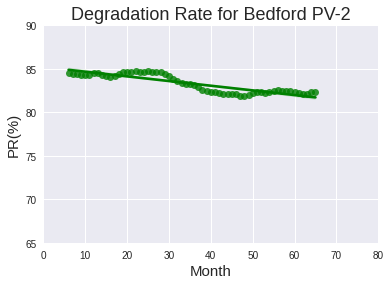

In [18]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = bedford_2, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Bedford PV-2",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Bedford PV-2 range -0.64 & -0.76%

# Degredation Analysis for Bedford PV-03

In [19]:
bedford_3 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Bedford3.csv')

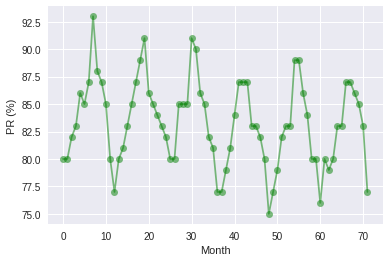

In [20]:
fig, axs = plt.subplots()
axs.plot(bedford_3.index, bedford_2.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(bedford_3.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [21]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [22]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     88.12
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.06e-13
Time:                        18:25:50   Log-Likelihood:                -72.058
No. Observations:                  60   AIC:                             148.1
Df Residuals:                      58   BIC:                             152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3666      0.241    354.470      0.000      84.885      85.849
x1            -0.0572      0.006     -9.387      0.000      -0.069      -0.045
==============================================================================
Omnibus:                        2.277   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                2.111
Skew:                           0.449   Prob(JB):                        0.348
Kurtosis:                       2.804   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [23]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.69

In [24]:
results.params

array([ 8.53665933e+01, -5.72358062e-02])

In [25]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.8

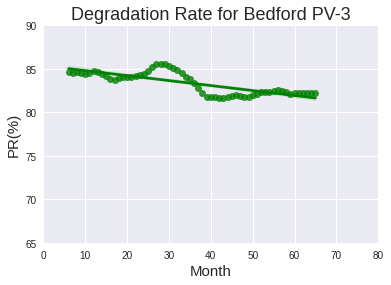

In [27]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = bedford_2, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Bedford PV-3",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Bedford PV-2 range -0.69 & -0.80%